In [1]:
import sys
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path_root = '../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot 

level = 'andamento-nazionale'

path_data = f'{path_root}/data'
# Paths dependant on path_data
path_img_root =  f'{path_data}/imgs/grafici/{level}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/covid19-{level}.csv'

In [2]:
df_n_raw = pd.read_csv(csv_in_name)
# df_n_raw
list(df_n_raw.columns)

['data',
 'ricoverati_con_sintomi',
 'terapia_intensiva',
 'totale_ospedalizzati',
 'isolamento_domiciliare',
 'totale_positivi',
 'variazione_totale_positivi',
 'nuovi_positivi',
 'dimessi_guariti',
 'deceduti',
 'casi_da_sospetto_diagnostico',
 'casi_da_screening',
 'totale_casi',
 'tamponi',
 'casi_testati',
 'ingressi_terapia_intensiva',
 'totale_positivi_test_molecolare',
 'totale_positivi_test_antigenico_rapido',
 'tamponi_test_molecolare',
 'tamponi_test_antigenico_rapido',
 'variazione_terapia_intensiva',
 'variazione_ricoverati_con_sintomi',
 'variazione_totale_ospedalizzati',
 'variazione_isolamento_domiciliare',
 'nuovi_dimessi_guariti',
 'nuovi_deceduti',
 'nuovi_tamponi',
 'nuovi_casi_testati',
 'ti_su_to',
 'to_su_tp',
 'np_su_nt',
 'np_su_nct',
 'var_ti_perc',
 'var_pos_perc']

In [3]:
# df_n[-2:].iloc[:, 1:]
df_last = df_n_raw[-1:]

In [4]:
# Print stats
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2834
Nuovi tamponi: 238354.0
Percentuale nuovi positivi/nuovi tamponi: 1.0 %
Nuovi guariti: 2065.0
Nuovi deceduti: 41.0
Variazione positivi ricoverati con sintomi: 129.0
Variazione positivi in terapia intensiva: 21.0
Variazione positivi in isolamento dimiciliare: 575.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_n_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 11, 2, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-09-03T17:00:00,4164,556,4720,132305,137025,127,6735,4293535,129410,...,6544.0,58.0,296394.0,63510.0,11.78,3.44,2.27,10.60,0.18,0.09
1,2021-09-04T17:00:00,4204,569,4773,132266,137039,14,6157,4299621,129466,...,6086.0,56.0,331350.0,70695.0,11.92,3.48,1.86,8.71,2.34,0.01
2,2021-09-05T17:00:00,4216,572,4788,131914,136702,-337,5315,4305223,129515,...,5602.0,49.0,259756.0,61529.0,11.95,3.50,2.05,8.64,0.53,-0.25
3,2021-09-06T17:00:00,4302,570,4872,131148,136020,-682,3361,4309200,129567,...,3977.0,52.0,134393.0,28896.0,11.70,3.58,2.50,11.63,-0.35,-0.50
4,2021-09-07T17:00:00,4307,563,4870,128917,133787,-2233,4720,4316077,129638,...,6877.0,71.0,318865.0,66034.0,11.56,3.64,1.48,7.15,-1.23,-1.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-10-29T17:00:00,2658,349,3007,75637,78644,1866,5335,4551882,132037,...,3433.0,33.0,474778.0,59143.0,11.61,3.82,1.12,9.02,0.58,2.43
57,2021-10-30T17:00:00,2707,346,3053,77328,80381,1737,4878,4554985,132074,...,3103.0,37.0,477352.0,60684.0,11.33,3.80,1.02,8.04,-0.86,2.21
58,2021-10-31T17:00:00,2754,342,3096,79352,82448,2067,4526,4557417,132100,...,2432.0,26.0,350170.0,57293.0,11.05,3.76,1.29,7.90,-1.16,2.57
59,2021-11-01T17:00:00,2863,364,3227,80495,83722,1274,2818,4558941,132120,...,1524.0,20.0,146725.0,27778.0,11.28,3.85,1.92,10.14,6.43,1.55


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'nuovi_tamponi': {'label': 'Nuovi tamponi', 'file_name': 'nuovi_tamponi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df_n, 'data', graph_prop)

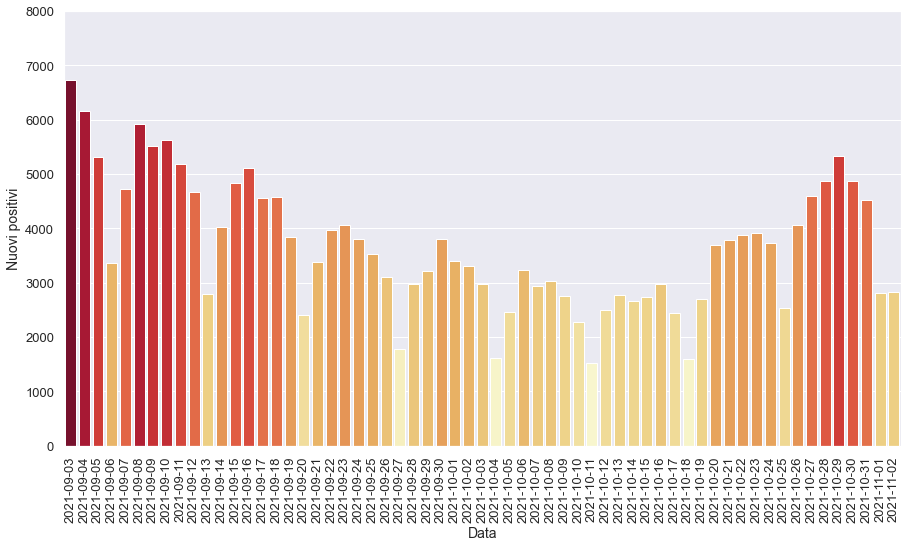

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

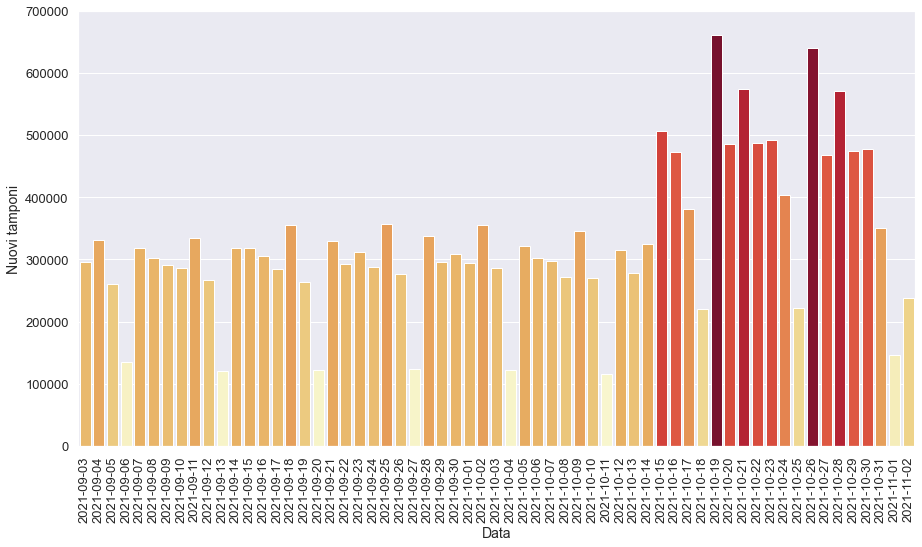

In [9]:
# New swabs
y_col = 'nuovi_tamponi'
fig = bp.draw_bar_plot(y_col=y_col)

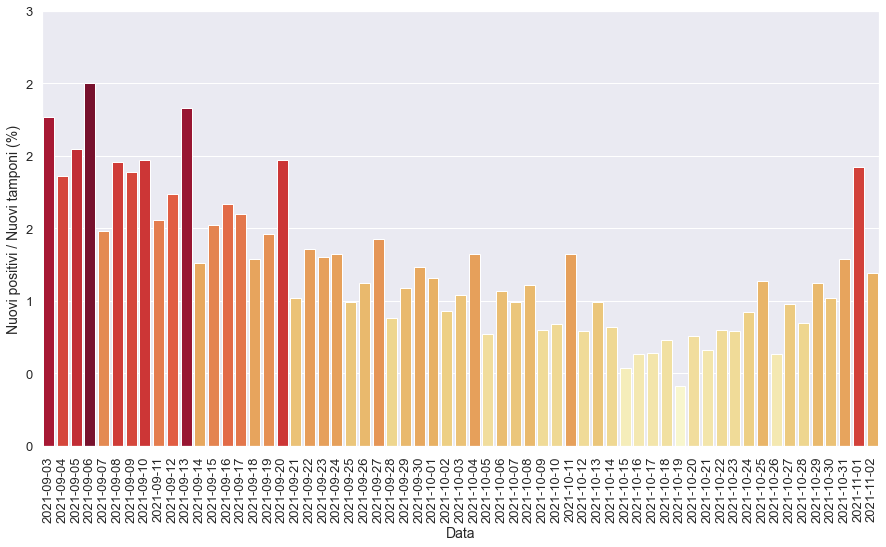

In [10]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

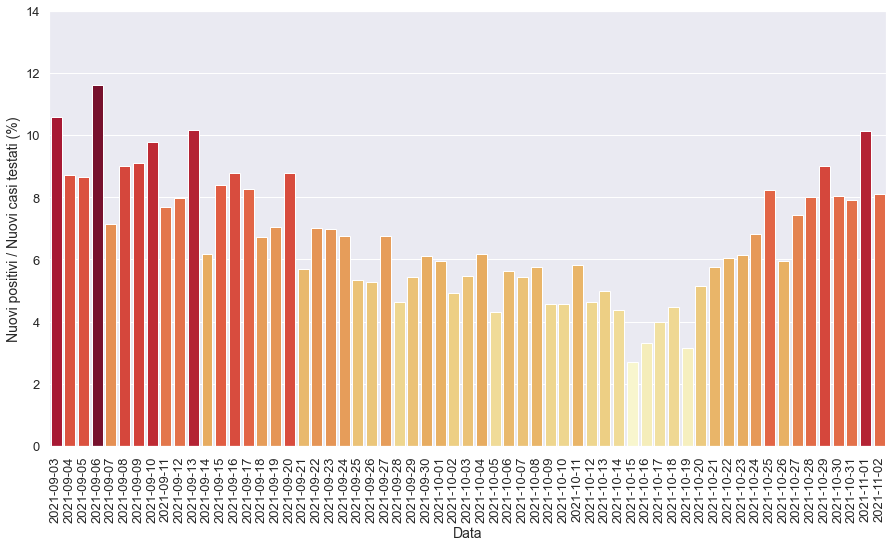

In [11]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

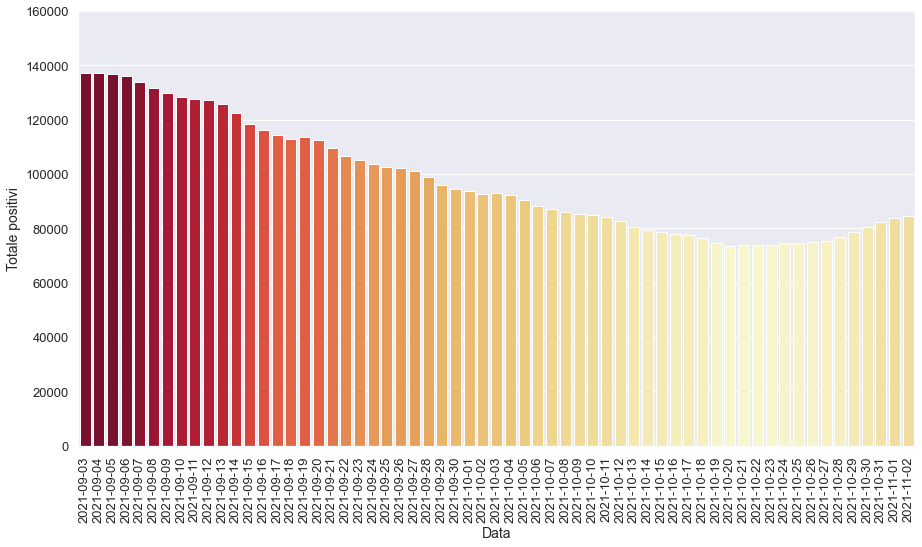

In [12]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

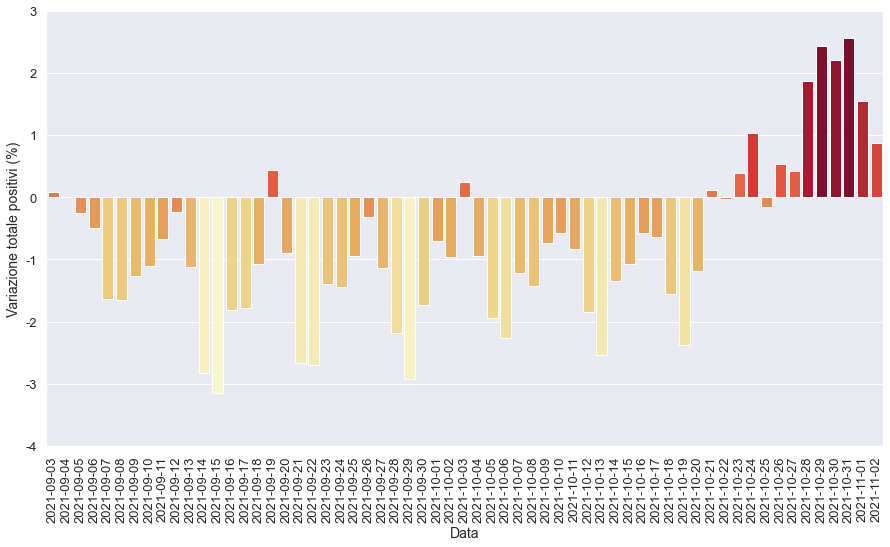

In [13]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

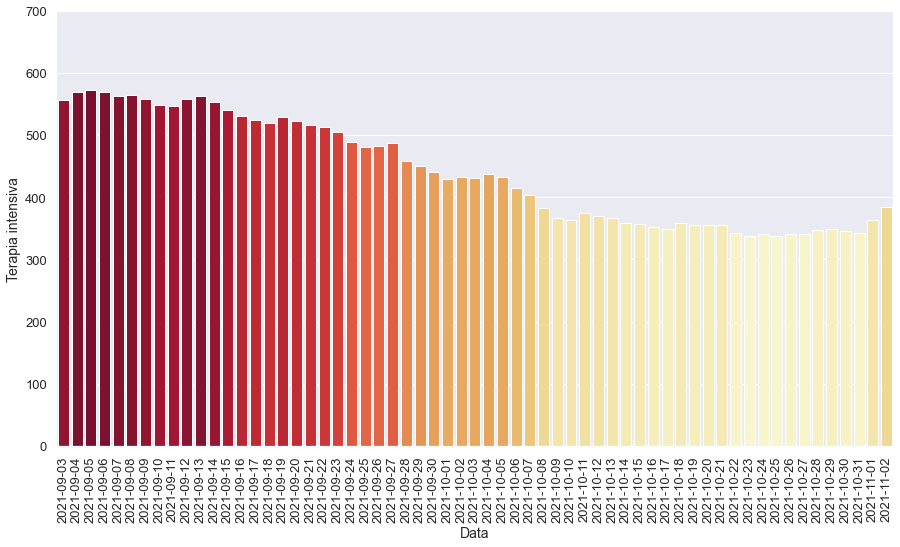

In [14]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

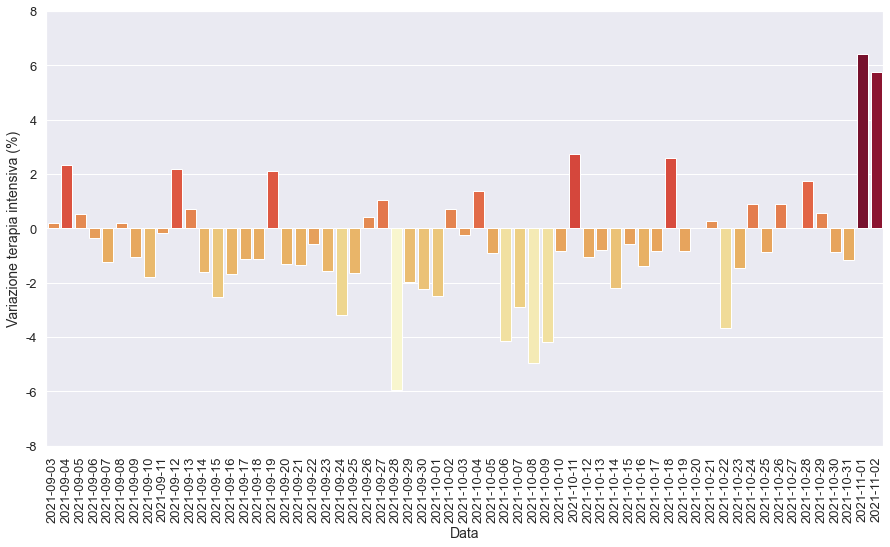

In [15]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

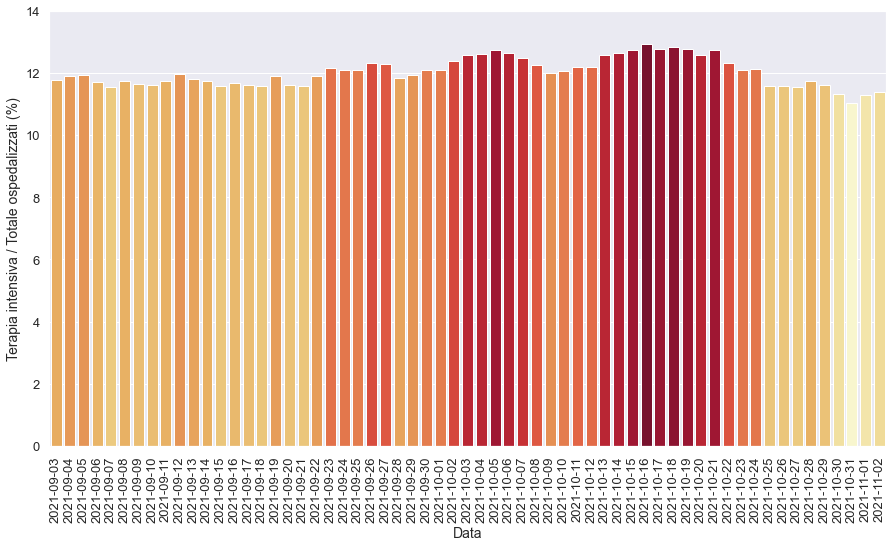

In [16]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

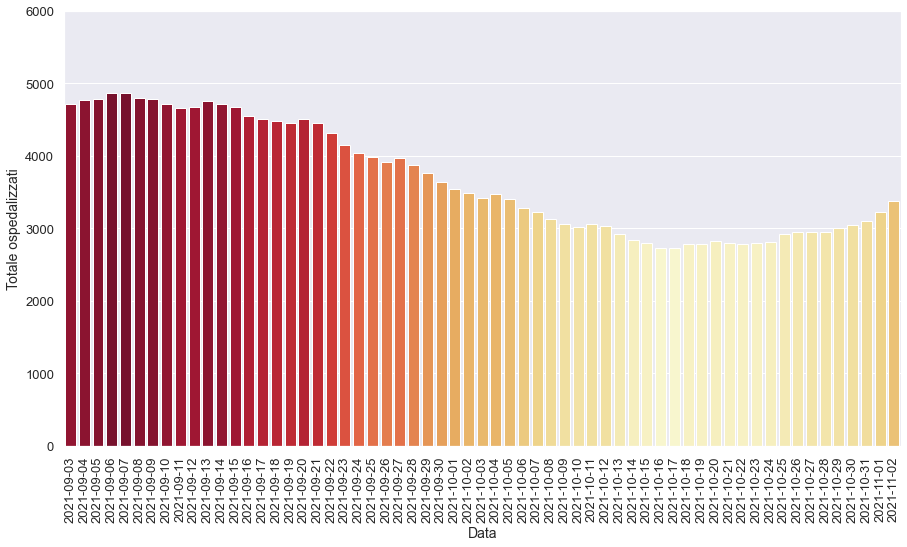

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

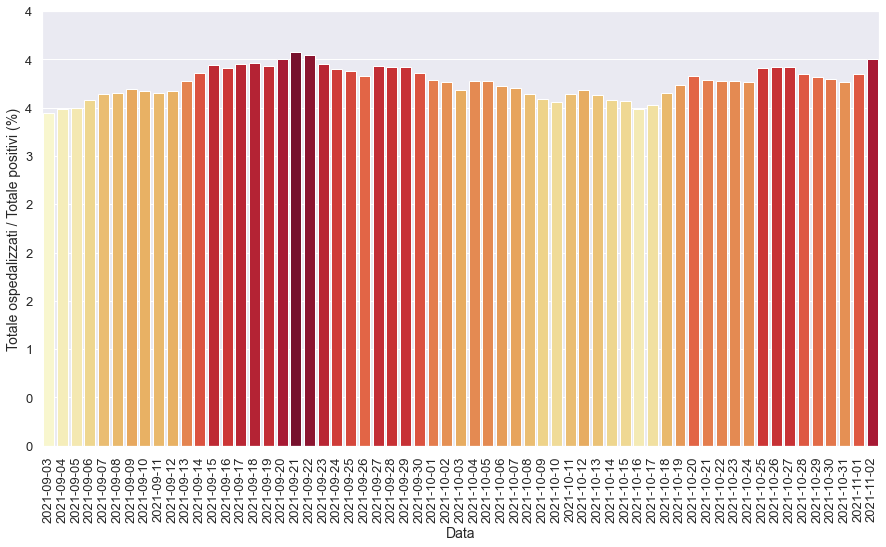

In [18]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

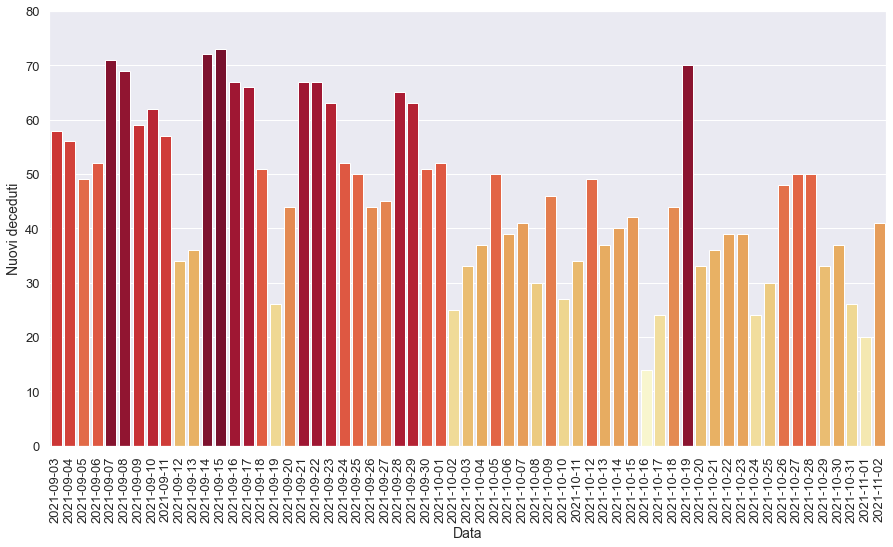

In [19]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

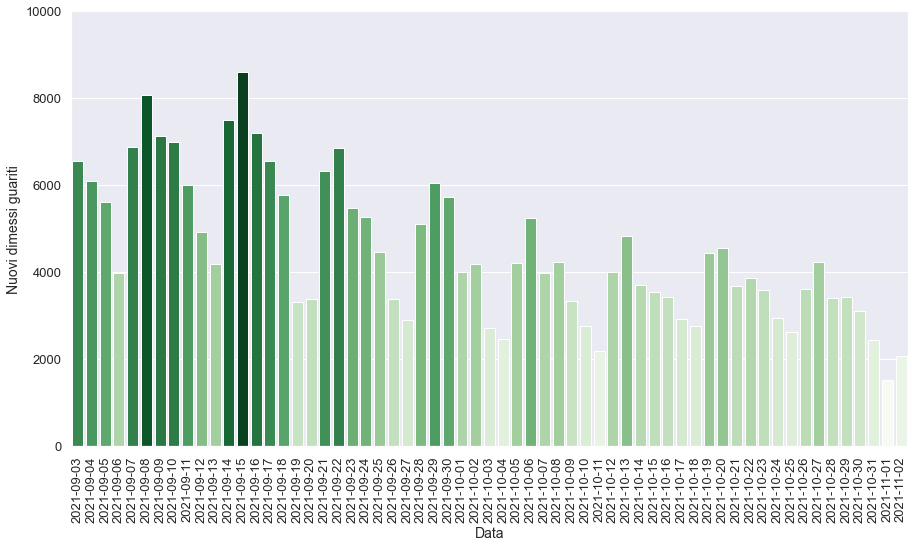

In [20]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [21]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n;

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-10-03T17:00:00,2991,431,3422,89545,92967,218,2968,4458036,131031,...,2716.0,33.0,285960.0,54325.0,12.59,3.68,1.04,5.46,-0.23,0.24
1,2021-10-04T17:00:00,3032,437,3469,88627,92096,-871,1612,4460482,131068,...,2446.0,37.0,122214.0,26069.0,12.60,3.77,1.32,6.18,1.39,-0.94
2,2021-10-05T17:00:00,2968,433,3401,86898,90299,-1797,2466,4464692,131118,...,4210.0,50.0,322282.0,57068.0,12.73,3.77,0.77,4.32,-0.92,-1.95
3,2021-10-06T17:00:00,2872,415,3287,84960,88247,-2052,3235,4469937,131157,...,5245.0,39.0,301773.0,57328.0,12.63,3.72,1.07,5.64,-4.16,-2.27
4,2021-10-07T17:00:00,2824,403,3227,83946,87173,-1074,2938,4473903,131198,...,3966.0,41.0,297356.0,53955.0,12.49,3.70,0.99,5.45,-2.89,-1.22
5,2021-10-08T17:00:00,2742,383,3125,82801,85926,-1247,3023,4478137,131228,...,4234.0,30.0,271566.0,52525.0,12.26,3.64,1.11,5.76,-4.96,-1.43
6,2021-10-09T17:00:00,2692,367,3059,82243,85302,-624,2748,4481462,131274,...,3325.0,46.0,344969.0,60014.0,12.00,3.59,0.80,4.58,-4.18,-0.73
7,2021-10-10T17:00:00,2651,364,3015,81793,84808,-494,2278,4484207,131301,...,2745.0,27.0,270044.0,49817.0,12.07,3.56,0.84,4.57,-0.82,-0.58
8,2021-10-11T17:00:00,2688,374,3062,81044,84106,-702,1516,4486391,131335,...,2184.0,34.0,114776.0,26049.0,12.21,3.64,1.32,5.82,2.75,-0.83
9,2021-10-12T17:00:00,2665,370,3035,79511,82546,-1560,2494,4490388,131384,...,3997.0,49.0,315285.0,53846.0,12.19,3.68,0.79,4.63,-1.07,-1.85


In [22]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

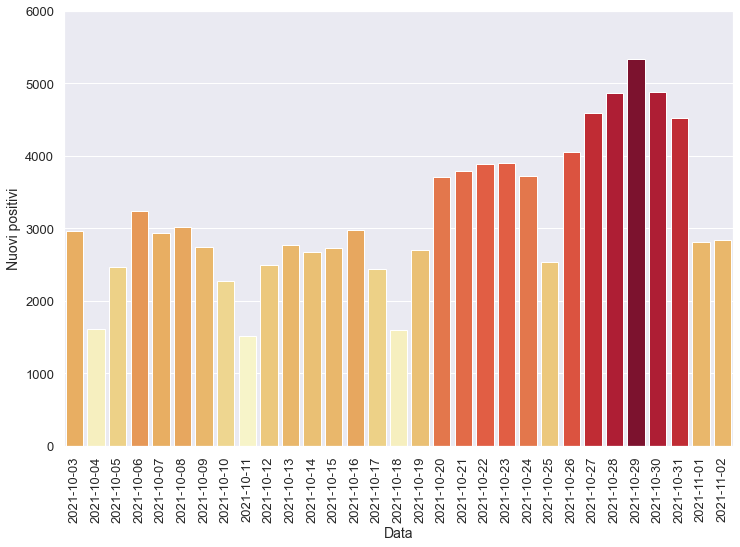

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

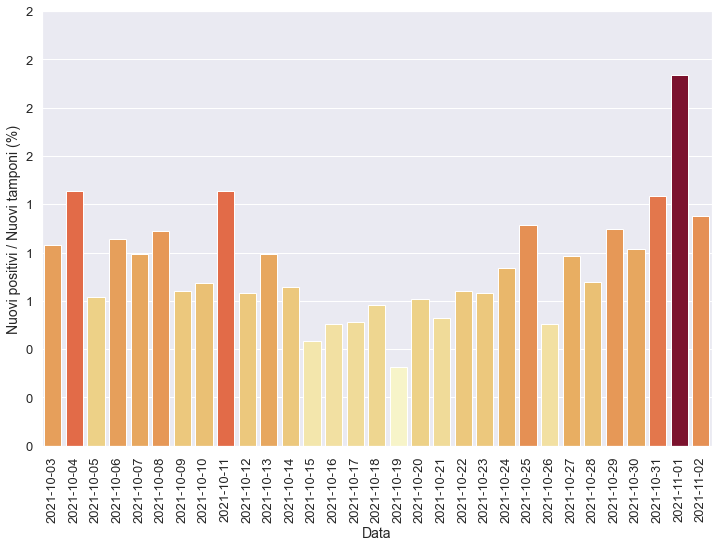

In [24]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

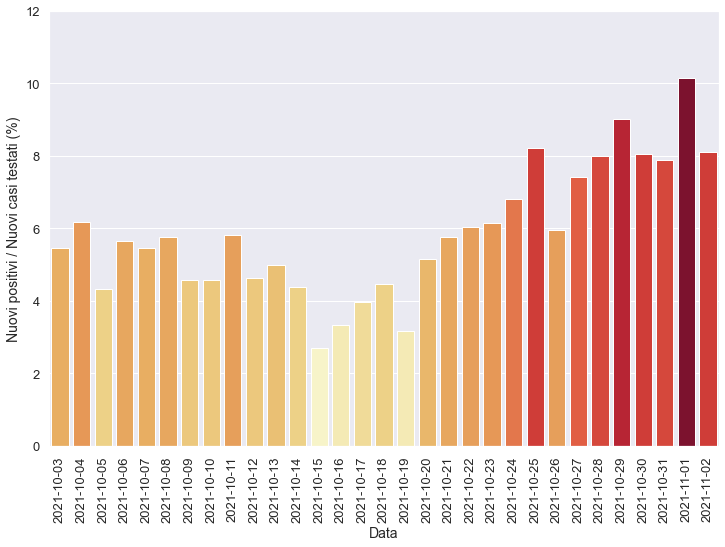

In [25]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

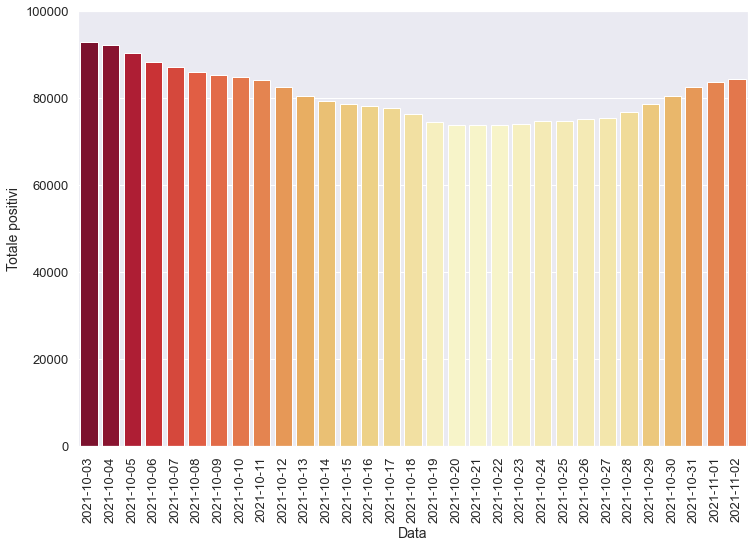

In [26]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

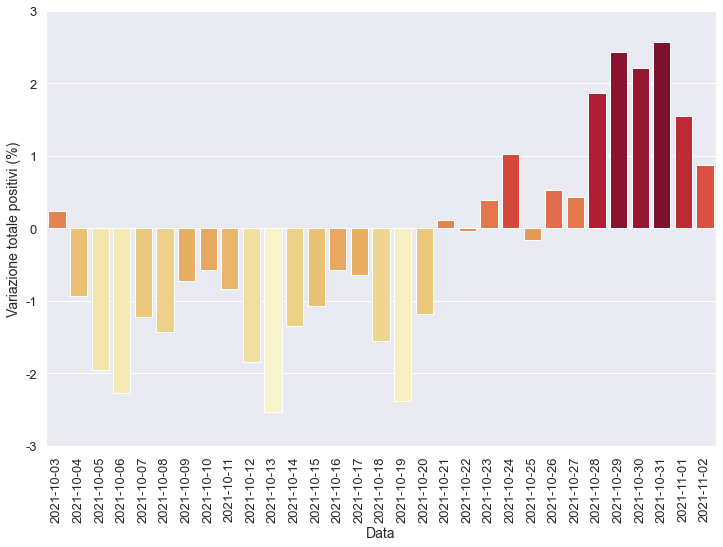

In [27]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

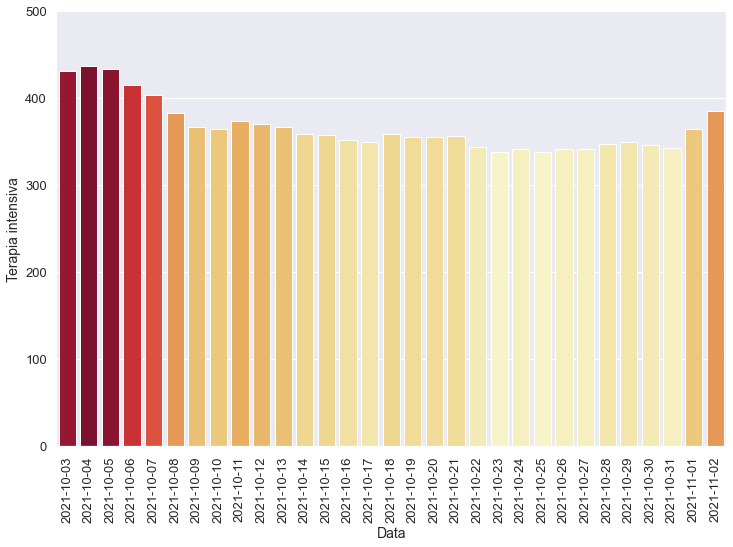

In [28]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

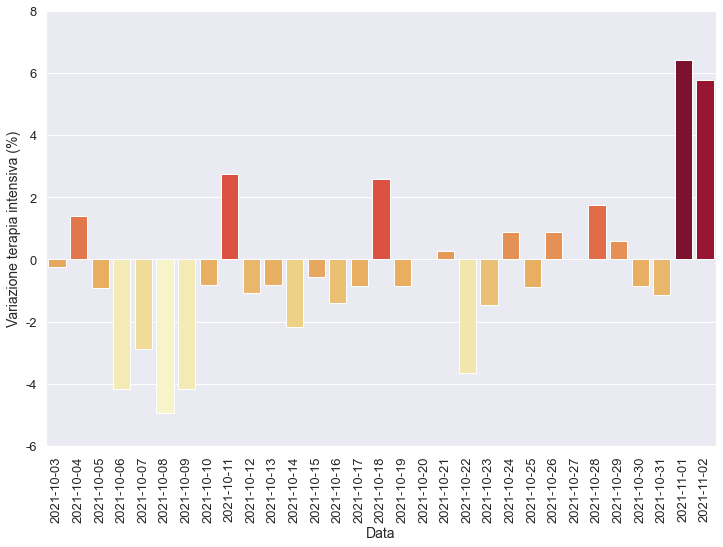

In [29]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

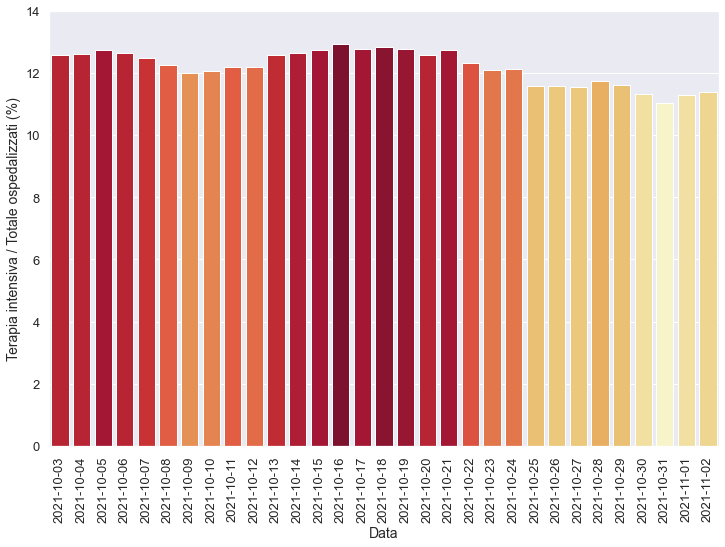

In [30]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

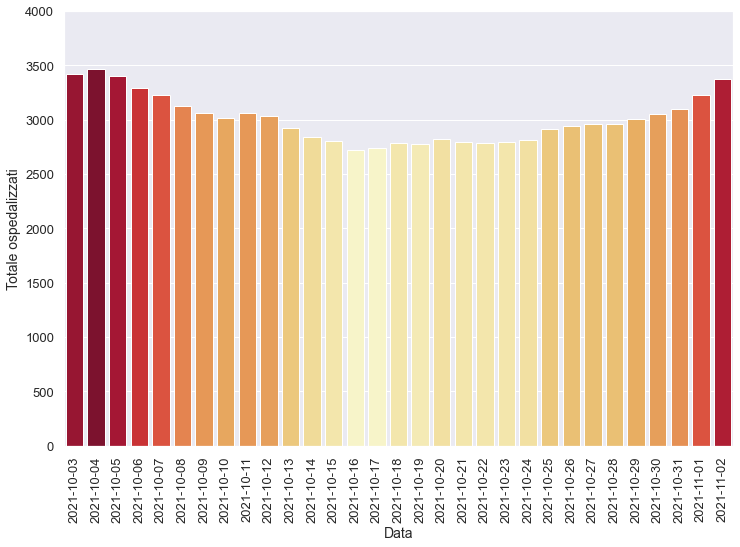

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

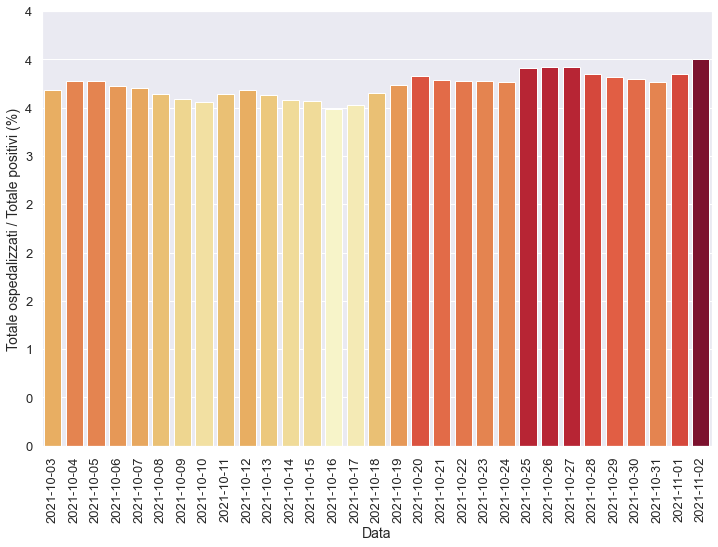

In [32]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

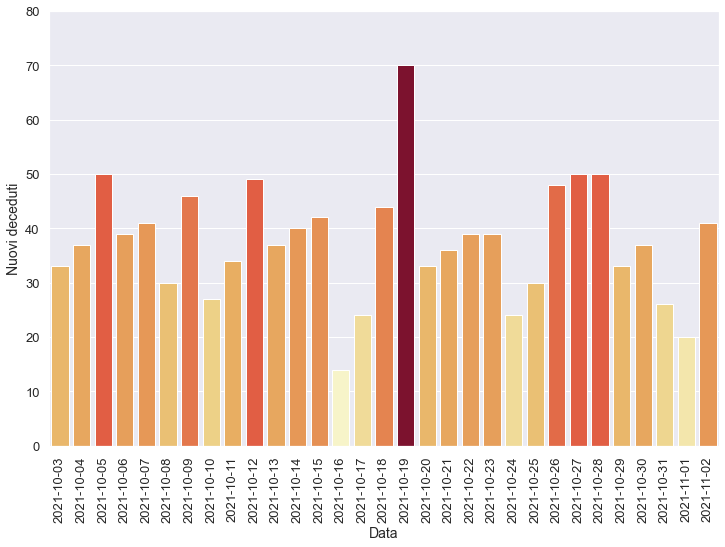

In [33]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

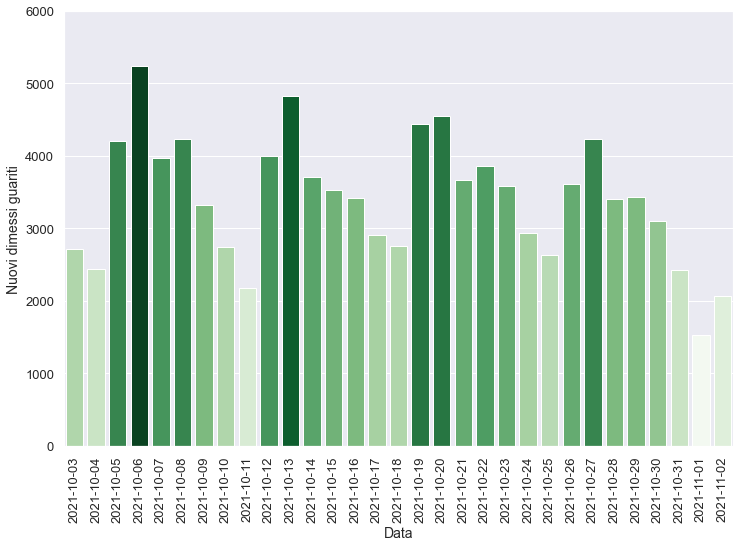

In [34]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [35]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-10-26T17:00:00,2604,341,2945,72101,75046,392,4054,4540823,131904,...,3613.0,48.0,639745.0,68164.0,11.58,3.92,0.63,5.95,0.89,0.53
1,2021-10-27T17:00:00,2615,341,2956,72409,75365,319,4598,4545049,131954,...,4226.0,50.0,468104.0,61954.0,11.54,3.92,0.98,7.42,0.00,0.43
2,2021-10-28T17:00:00,2609,347,2956,73822,76778,1413,4866,4548449,132004,...,3400.0,50.0,570335.0,60835.0,11.74,3.85,0.85,8.00,1.76,1.87
3,2021-10-29T17:00:00,2658,349,3007,75637,78644,1866,5335,4551882,132037,...,3433.0,33.0,474778.0,59143.0,11.61,3.82,1.12,9.02,0.58,2.43
4,2021-10-30T17:00:00,2707,346,3053,77328,80381,1737,4878,4554985,132074,...,3103.0,37.0,477352.0,60684.0,11.33,3.80,1.02,8.04,-0.86,2.21
5,2021-10-31T17:00:00,2754,342,3096,79352,82448,2067,4526,4557417,132100,...,2432.0,26.0,350170.0,57293.0,11.05,3.76,1.29,7.90,-1.16,2.57
6,2021-11-01T17:00:00,2863,364,3227,80495,83722,1274,2818,4558941,132120,...,1524.0,20.0,146725.0,27778.0,11.28,3.85,1.92,10.14,6.43,1.55
7,2021-11-02T17:00:00,2992,385,3377,81070,84447,725,2834,4561006,132161,...,2065.0,41.0,238354.0,34890.0,11.40,4.00,1.19,8.12,5.77,0.87


In [36]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

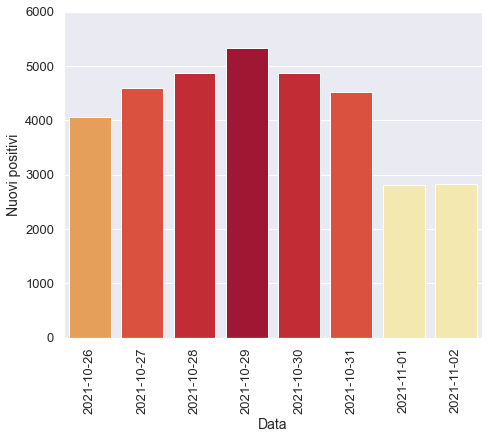

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

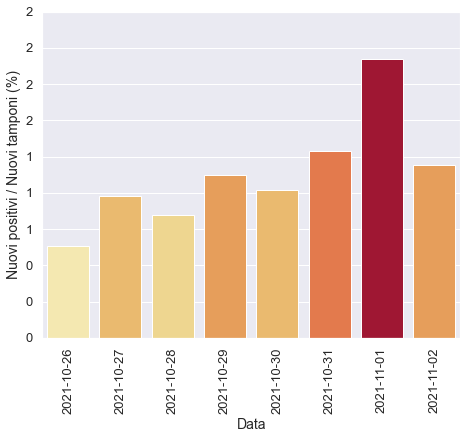

In [38]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

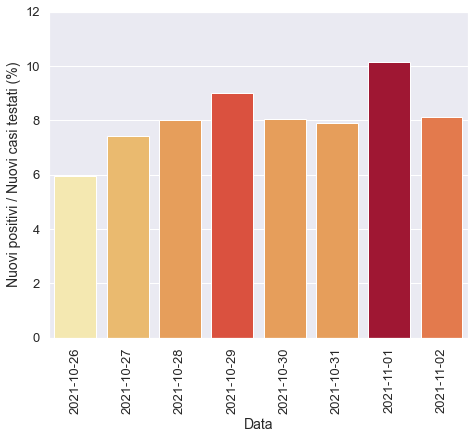

In [39]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

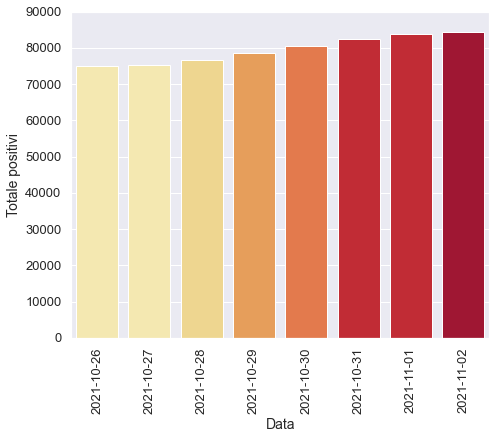

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

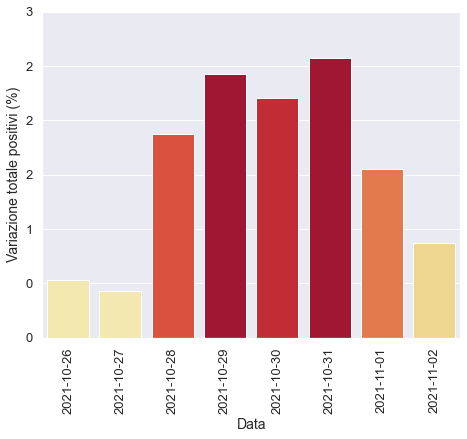

In [41]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

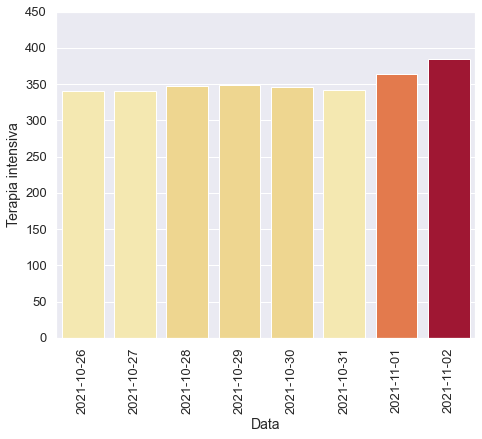

In [42]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

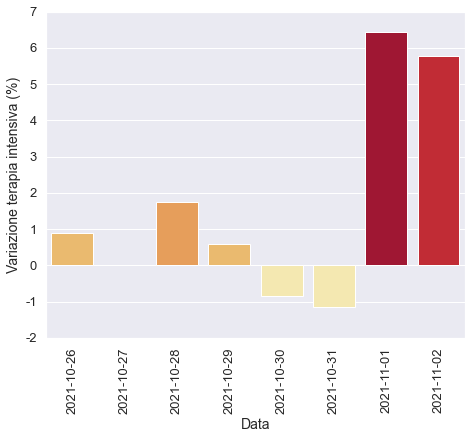

In [43]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

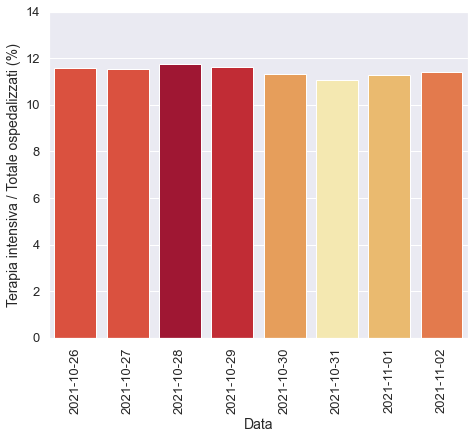

In [44]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

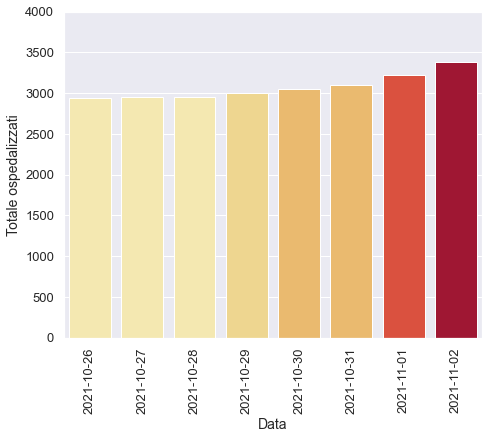

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

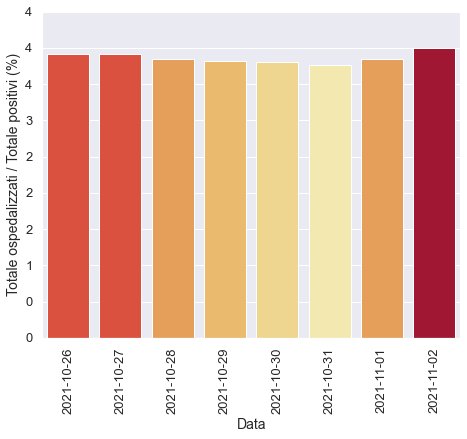

In [46]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

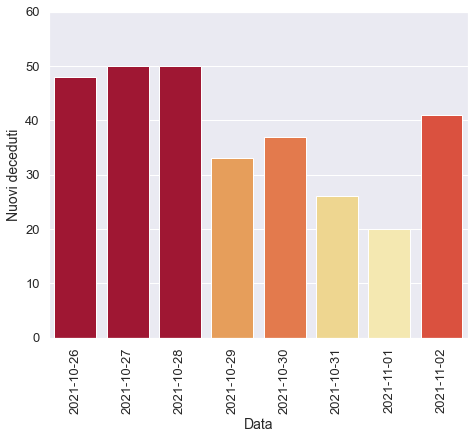

In [47]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

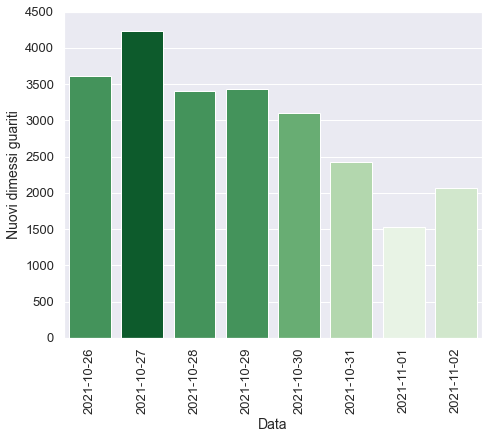

In [48]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)